'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
Arbre de décision - Accuracy: 0.7808989 
Arbre de décision - Taux d'erreur: 0.2191011 
Naive Bayes - Accuracy: 0.7808989 
Naive Bayes - Taux d'erreur: 0.2191011 

Comparaison des performances des modèles :
Arbre de décision - Accur

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_2.0.0.tar.gz'
Content type 'application/x-gzip' length 704618 bytes (688 KB)
downloaded 688 KB


The downloaded source packages are in
	‘/tmp/RtmpJP9nHQ/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/caret_7.0-1.tar.gz'
Content type 'application/x-gzip' length 2273919 bytes (2.2 MB)
downloaded 2.2 MB


The downloaded source packages are in
	‘/tmp/RtmpJP9nHQ/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/e1071_1.7-16.tar.gz'
Content type 'application/x-gzip' length 326734 bytes (319 KB)
downloaded 319 KB


The downloaded source packages are in
	‘/tmp/RtmpJP9nHQ/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘

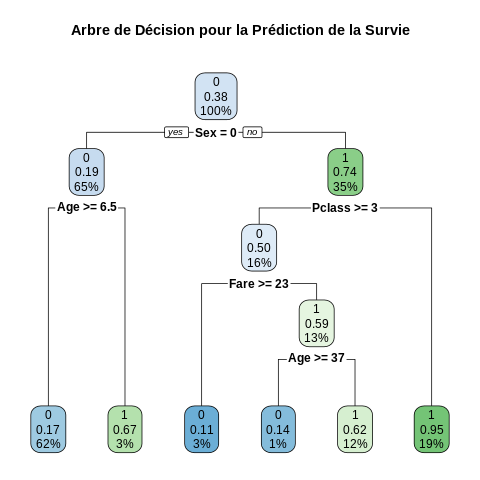

In [13]:
%%R
# Installer les packages nécessaires
install.packages("tidyverse")
install.packages("caret")
install.packages("e1071")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("naivebayes")
install.packages("ggplot2")

# Charger les bibliothèques
library(tidyverse)
library(caret)
library(e1071)
library(rpart)
library(rpart.plot)
library(naivebayes)
library(ggplot2)

# Charger les données
train_data <- read.csv("train.csv")
test_data <- read.csv("test.csv")
gender_submission <- read.csv("gender_submission.csv")

# Aperçu des données
head(train_data)
str(train_data)

# Fonction pour obtenir le mode
getmode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Prétraitement des données : gestion des valeurs manquantes et transformation des variables
train_data$Age[is.na(train_data$Age)] <- mean(train_data$Age, na.rm = TRUE)
train_data$Embarked[is.na(train_data$Embarked)] <- as.character(getmode(train_data$Embarked))
train_data$Fare[is.na(train_data$Fare)] <- mean(train_data$Fare, na.rm = TRUE)

train_data$Sex <- factor(train_data$Sex, levels = c("male", "female"), labels = c(0, 1))
train_data$Embarked <- factor(train_data$Embarked, levels = c("C", "Q", "S"), labels = c(1, 2, 3))

# Sélectionner les caractéristiques et la cible
X <- train_data %>% select(Age, Sex, Pclass, Fare, Embarked)
y <- train_data$Survived

# Diviser les données en ensemble d'entraînement et de test
set.seed(42)
train_index <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X[train_index, ]
y_train <- y[train_index]
X_test <- X[-train_index, ]
y_test <- y[-train_index]

# Entraîner un modèle Arbre de Décision
tree_model <- rpart(Survived ~ Age + Sex + Pclass + Fare + Embarked, data = train_data, method = "class")

# Prédictions pour l'Arbre de Décision
y_pred_tree <- predict(tree_model, X_test, type = "class")

# Calcul de l'accuracy et du taux d'erreur
accuracy_tree <- mean(y_pred_tree == y_test)
error_rate_tree <- 1 - accuracy_tree

cat("Arbre de décision - Accuracy:", accuracy_tree, "\n")
cat("Arbre de décision - Taux d'erreur:", error_rate_tree, "\n")

# Affichage de l'arbre de décision
rpart.plot(tree_model, main = "Arbre de Décision pour la Prédiction de la Survie")

# Entraîner un modèle Naive Bayes
nb_model <- naiveBayes(Survived ~ Age + Sex + Pclass + Fare + Embarked, data = train_data)

# Prédictions pour Naive Bayes
y_pred_nb <- predict(nb_model, X_test)

# Calcul de l'accuracy et du taux d'erreur
accuracy_nb <- mean(y_pred_nb == y_test)
error_rate_nb <- 1 - accuracy_nb

cat("Naive Bayes - Accuracy:", accuracy_nb, "\n")
cat("Naive Bayes - Taux d'erreur:", error_rate_nb, "\n")

# Comparaison des modèles
cat("\nComparaison des performances des modèles :\n")
cat("Arbre de décision - Accuracy:", accuracy_tree, ", Taux d'erreur:", error_rate_tree, "\n")
cat("Naive Bayes - Accuracy:", accuracy_nb, ", Taux d'erreur:", error_rate_nb, "\n")




In [11]:
%%R
install.packages("naivebayes")
# Installer les packages nécessaires
install.packages("tidyverse")
install.packages("caret")
install.packages("e1071")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("naivebayes")
install.packages("ggplot2")

# Charger les bibliothèques
library(tidyverse)
library(caret)
library(e1071)
library(rpart)
library(rpart.plot)
library(naivebayes)
library(ggplot2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/naivebayes_1.0.0.tar.gz'
Content type 'application/x-gzip' length 767061 bytes (749 KB)
downloaded 749 KB


The downloaded source packages are in
	‘/tmp/RtmpJP9nHQ/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_2.0.0.tar.gz'
Content type 'application/x-gzip' length 704618 bytes (688 KB)
downloaded 688 KB


The downloaded source packages are in
	‘/tmp/RtmpJP9nHQ/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/caret_7.0-1.tar.gz'
Content type 'application/x-gzip' length 2273919 bytes (2.2 MB)
downloaded 2.2 MB


The downloaded source packages are in
	‘/tmp/RtmpJP9nHQ/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(

In [6]:
%%R
install.packages("rpart")
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/rpart_4.1.24.tar.gz'
Content type 'application/x-gzip' length 620065 bytes (605 KB)
downloaded 605 KB


The downloaded source packages are in
	‘/tmp/RtmpJP9nHQ/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/rpart.plot_3.1.2.tar.gz'
Content type 'application/x-gzip' length 673083 bytes (657 KB)
downloaded 657 KB


The downloaded source packages are in
	‘/tmp/RtmpJP9nHQ/downloaded_packages’


In [4]:
%%R
install.packages("caret")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’

trying URL 'https://cran.rstudio.com/src/contrib/listenv_0.9.1.tar.gz'
Content type 'application/x-gzip' length 36600 bytes (35 KB)
downloaded 35 KB

trying URL 'https://cran.rstudio.com/src/contrib/parallelly_1.43.0.tar.gz'
Content type 'application/x-gzip' length 310739 bytes (303 KB)
downloaded 303 KB

trying URL 'https://cran.rstudio.com/src/contrib/future_1.40.0.tar.gz'
Content type 'application/x-gzip' length 415303 bytes (405 KB)
downloaded 405 KB

trying URL 'https://cran.rstudio.com/src/contrib/globals_0.16.3.tar.gz'
Content type 'application/x-gzip' length 37475 bytes (

In [1]:
%load_ext rpy2.ipython